MAE@0: 0.09029345372460497
MAE@2: 0.37697516930022573


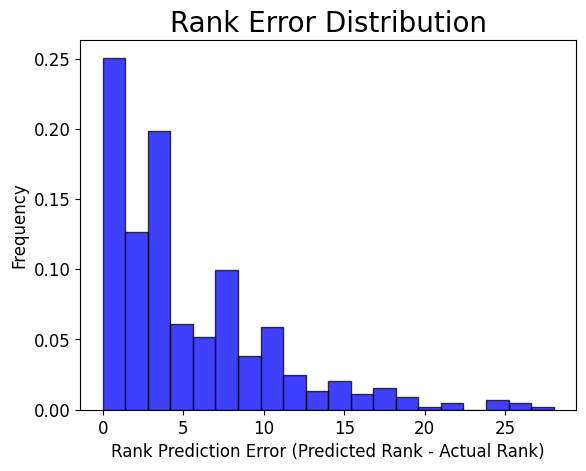

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Specify your CSV file path here
file_path = '/home/zhangqiyuan/bench_test/reproduce/results/pilot_neural_collaborative_filtering-3-half.csv'

# Read the data from the CSV file
df = pd.read_csv(file_path, header=None)

# Initialize lists to store rank data
predicted_ranks = []
actual_ranks = []
errors = []

# Convert scores to ranks within each row
for index, row in df.iterrows():
    if index == 0:
        continue
    # Parse scores and handle missing values '-'
    scores = [x.strip('[]').split(']/[') if ']/[' in x else (np.nan, np.nan) for x in row[1:]]
   
    predicted_scores = [float(score) if score != np.nan else np.nan for score, _ in scores]
    actual_scores = [float(score) if score != np.nan else np.nan for _, score in scores]
    
    # Obtain ranks
    pred_ranks = pd.Series(predicted_scores).rank(method='min').tolist()
    act_ranks = pd.Series(actual_scores).rank(method='min').tolist()

    predicted_ranks.append(pred_ranks)
    actual_ranks.append(act_ranks)

    # Compute errors and specific MAEs
    row_errors = [abs(p - a) for p, a in zip(pred_ranks, act_ranks) if not np.isnan(p) and not np.isnan(a)]
    errors.extend(row_errors)

# Compute MAE@0 and MAE@2 for all tasks
mae_at_0 = errors.count(0) / len(errors) if errors else 0
mae_at_2 = (errors.count(0) + errors.count(1) + errors.count(2)) / len(errors) if errors else 0


print(f"MAE@0: {np.mean(mae_at_0)}")
print(f"MAE@2: {np.mean(mae_at_2)}")

counts, bins = np.histogram(errors, bins=20)
total_counts = counts.sum()
proportions = counts / total_counts
# Plotting error distribution of ranks
# Creating bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

bar_width = np.diff(bins) #* 0.5  # Scaling factor to make bars slimmer
# Plotting with plt.bar for exact control
plt.bar(bin_centers, proportions, align='center', width=bar_width, alpha=0.75, color='blue', edgecolor='black')
#plt.hist(errors, bins=10, alpha=0.75, color='blue', edgecolor='black')
plt.title('Rank Error Distribution',fontsize=20)
plt.xlabel('Rank Prediction Error (Predicted Rank - Actual Rank)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.yticks(fontsize=12)#标注字体大小
plt.xticks(fontsize=12)
plt.grid(False)
plt.show()